In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# chunk size
chunk_size = 100000

chunks = pd.read_csv("chess_games.csv", chunksize=chunk_size)

first_chunk = next(chunks)

first_chunk.head(10)


,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
5,Blitz tournament,lucaseixasouza,diguim,0-1,2016.06.30,22:00:02,1773,1809,-10.0,10.0,C27,Vienna Game,180+0,Normal,1. e4 e5 2. Nc3 d6 3. Nf3 h6 4. Bc4 c6 5. b3 Q...
6,Blitz tournament,RENZZO77,HeadlessChicken,0-1,2016.06.30,22:00:02,1895,1886,-12.0,12.0,B10,Caro-Kann Defense: Two Knights Attack,180+0,Time forfeit,1. e4 c6 2. Nf3 d5 3. Nc3 dxe4 4. Nxe4 Nf6 5. ...
7,Blitz tournament,ipero,Bayern123,1-0,2016.06.30,22:00:02,2155,2356,20.0,-20.0,D02,Queen's Pawn Game: London System,180+0,Normal,1. d4 d5 2. Nf3 Nf6 3. Bf4 c6 4. e3 Bg4 5. Be2...
8,Blitz tournament,Loginov19510410,Kereshu,0-1,2016.06.30,22:00:02,2010,2111,-9.0,9.0,A45,Indian Game,300+0,Normal,1. d4 Nf6 2. Bf4 e6 3. e3 d5 4. Nf3 h6 5. Bd3 ...
9,Blitz tournament,Shambobala,cernunnoss,1-0,2016.06.30,22:00:02,1764,1773,12.0,-12.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Nf6 4. Be2 c6 5. ...


In [4]:
first_chunk.describe()

,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff
count,100000.000000,100000.000000,99954.000000,99954.000000
mean,1737.938750,1735.917760,0.623887,-0.189527
std,264.168375,265.711759,22.549863,22.435702
min,799.000000,738.000000,-537.000000,-570.000000
25%,1557.000000,1554.000000,-9.000000,-10.000000
50%,1738.000000,1735.000000,1.000000,-1.000000
75%,1914.250000,1914.000000,10.000000,9.000000
max,2737.000000,2731.000000,638.000000,644.000000


In [3]:
df=first_chunk.drop(["AN","UTCDate","UTCTime","White","Black","Opening"],axis=1)

In [14]:
first_chunk['White'].value_counts()

White
playfasterordie     110
BeautifulSquares     94
ssww94               93
companal2            91
palang1359           89
                   ... 
dissidents            1
marty108              1
ataman42              1
theproguy88           1
brkoni69              1
Name: count, Length: 24307, dtype: int64

In [10]:
# Creating a function to explore data
def explore(df):
  df.drop_duplicates
  print(f"The shape of the dataset is {df.shape}")
  df.info()
  # Histograms
  for column in df.columns:
    plt.figure()
    if df[column].dtype=='object':
      sns.countplot(x=column,data=df)
      plt.title(f"COunt plot for {column}")
    else:
      sns.histplot(df[column],kde=True)
      plt.title(f"Histogram plot for {column}")

    plt.show()
  # Correlation anyalysis

  # Getting numerical columns
  numerical_features = df.select_dtypes(include=['float', 'int'])

  # Finding correlation
  correlation_matrix = numerical_features.corr()

  # Visualization
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()

The shape of the dataset is (100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Event            100000 non-null  object 
 1   Result           100000 non-null  object 
 2   WhiteElo         100000 non-null  int64  
 3   BlackElo         100000 non-null  int64  
 4   WhiteRatingDiff  99954 non-null   float64
 5   BlackRatingDiff  99954 non-null   float64
 6   ECO              100000 non-null  object 
 7   TimeControl      100000 non-null  object 
 8   Termination      100000 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.9+ MB


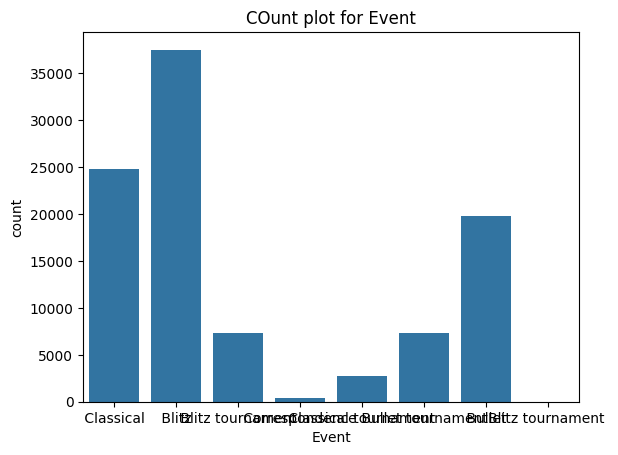

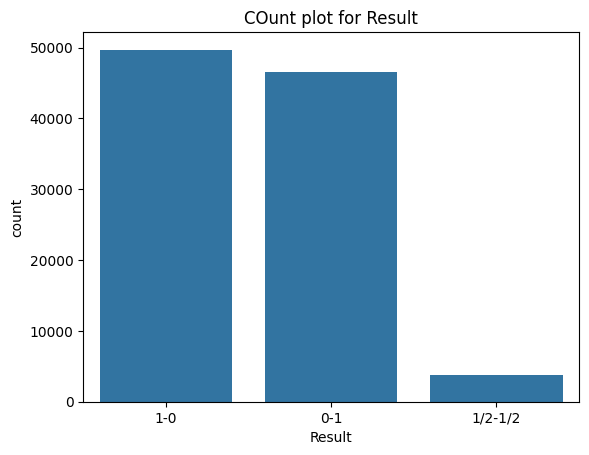

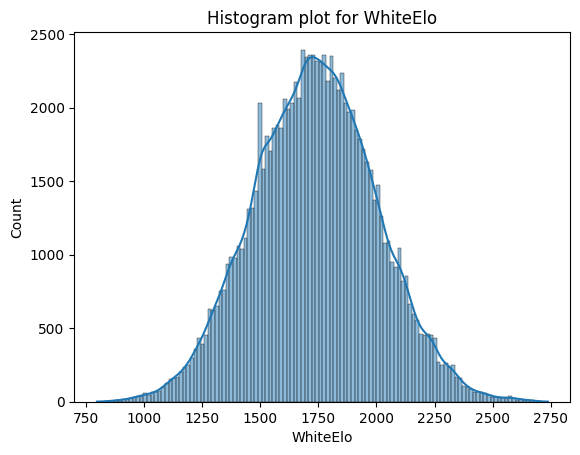

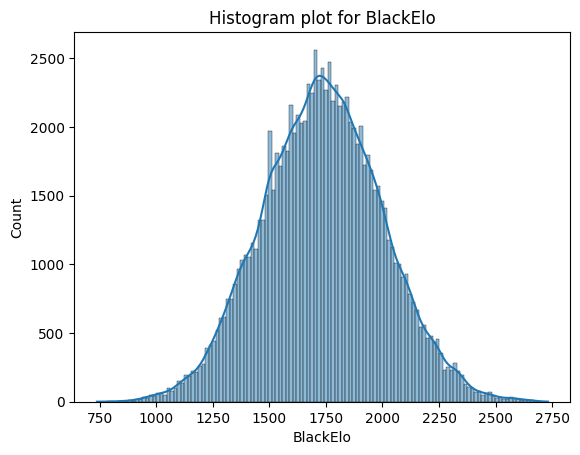

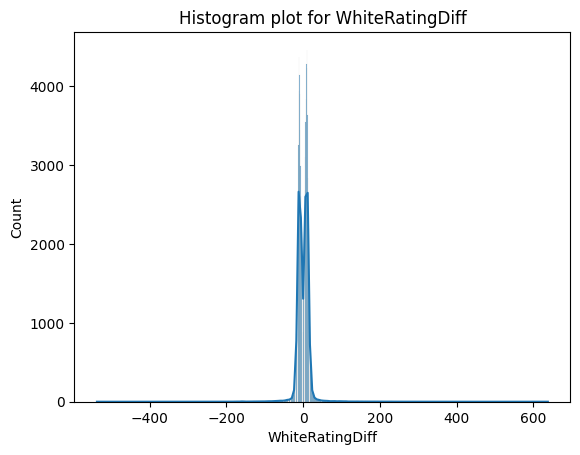

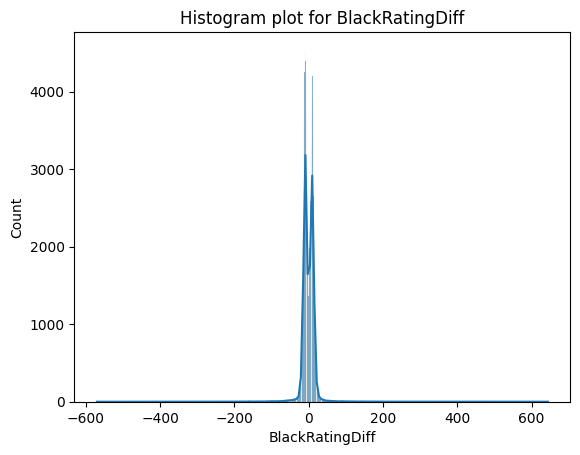

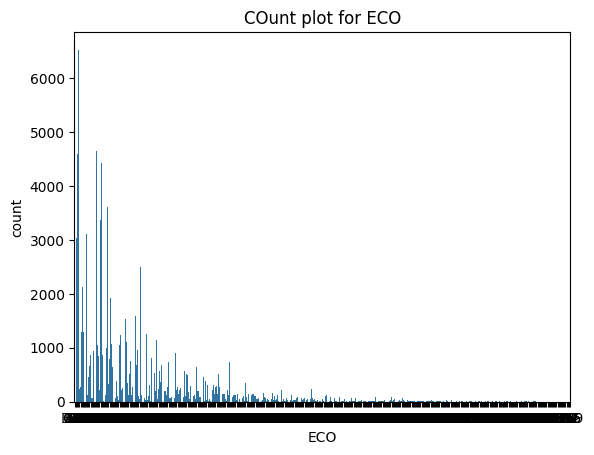

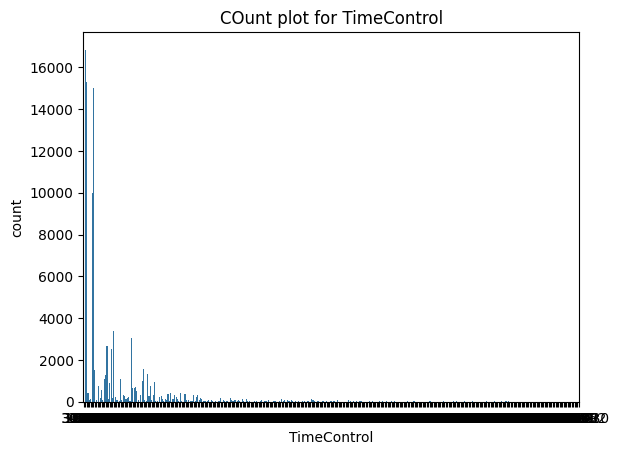

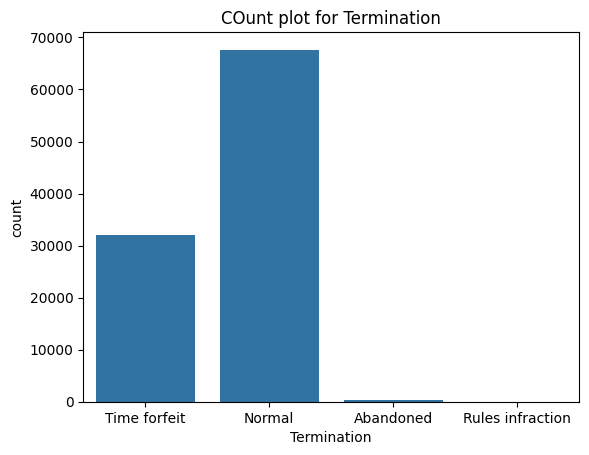

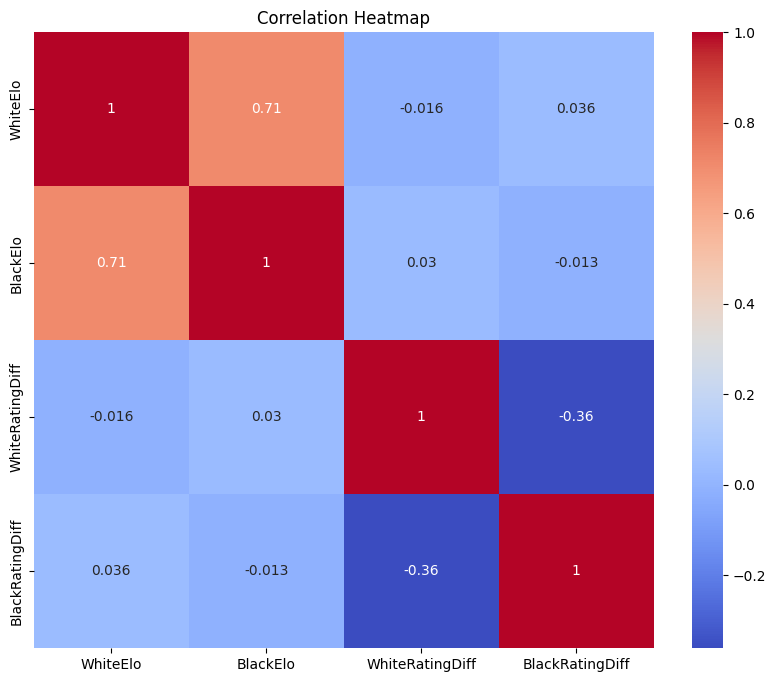

In [11]:
explore(df)

In [18]:
first_chunk['Event'].value_counts()

Event
 Blitz                    37532
 Classical                24832
 Bullet                   19766
 Bullet tournament         7379
 Blitz tournament          7342
 Classical tournament      2752
 Correspondence             396
Blitz tournament              1
Name: count, dtype: int64

In [14]:
df.shape

(100000, 9)

In [4]:
# Normalize text
df["Event"] = df["Event"].str.strip()

# Only keep exact matches
valid_events = ["Blitz", "Bullet", "Classical"]
df = df[df["Event"].isin(valid_events)]

# Optional: reset index
df.reset_index(drop=True, inplace=True)


In [5]:
df['Event'].value_counts()

Event
Blitz        37532
Classical    24832
Bullet       19766
Name: count, dtype: int64

In [38]:
df.head()

,Event,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination
0,Classical,1-0,1901,1896,11.0,-11.0,D10,300+5,Time forfeit
1,Blitz,0-1,1641,1627,-11.0,12.0,C20,300+0,Normal
2,Classical,0-1,1649,1638,-13.0,11.0,C57,900+3,Normal
3,Classical,1-0,1630,1500,7.0,-7.0,C41,420+5,Normal
4,Classical,1-0,1635,1572,9.0,-10.0,C54,300+8,Normal


In [6]:
df=df.dropna()

In [40]:
df.shape

(82098, 9)

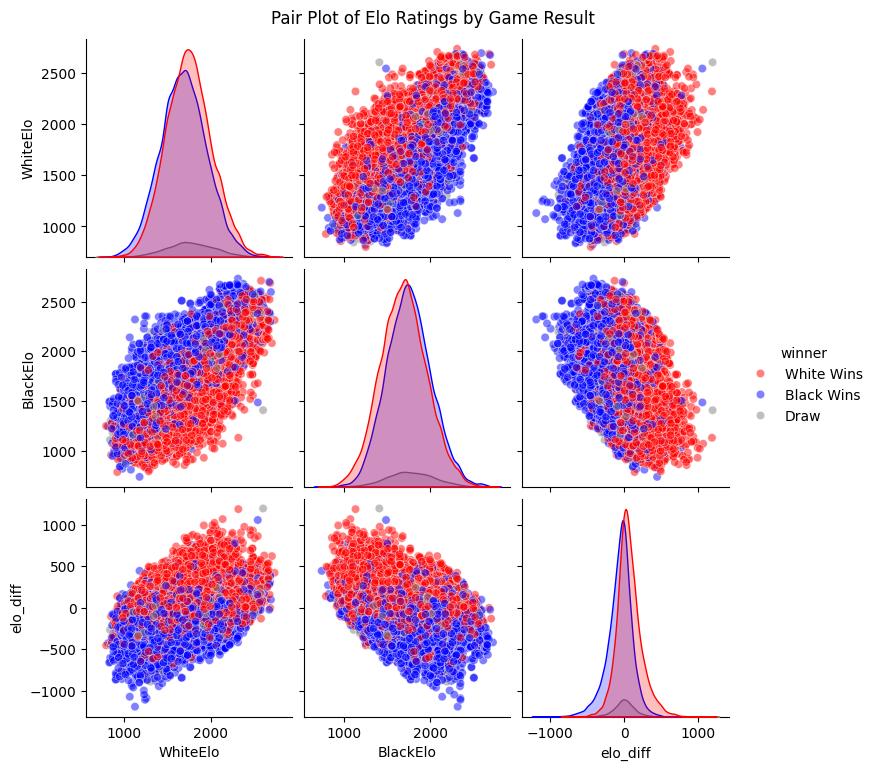

In [7]:
# Create a new column to label the winner
def determine_winner(result):
    if result == '1-0':
        return 'White Wins'
    elif result == '0-1':
        return 'Black Wins'
    elif result == '1/2-1/2':
        return 'Draw'
    else:
        return 'Unknown'

df['winner'] = df['Result'].apply(determine_winner)

# Create elo difference column
df['elo_diff'] = df['WhiteElo'] - df['BlackElo']

# Select features to compare
features = ['WhiteElo', 'BlackElo', 'elo_diff']

# Create pair plot
sns.pairplot(df, vars=features, hue='winner', palette={'White Wins': 'red', 'Black Wins': 'blue', 'Draw': 'gray'}, plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Elo Ratings by Game Result", y=1.02)
plt.show()


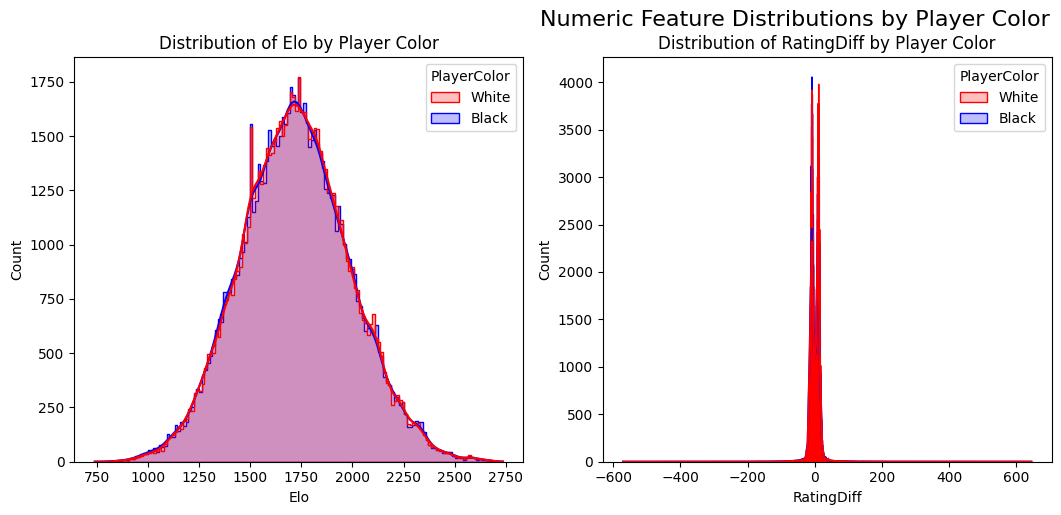

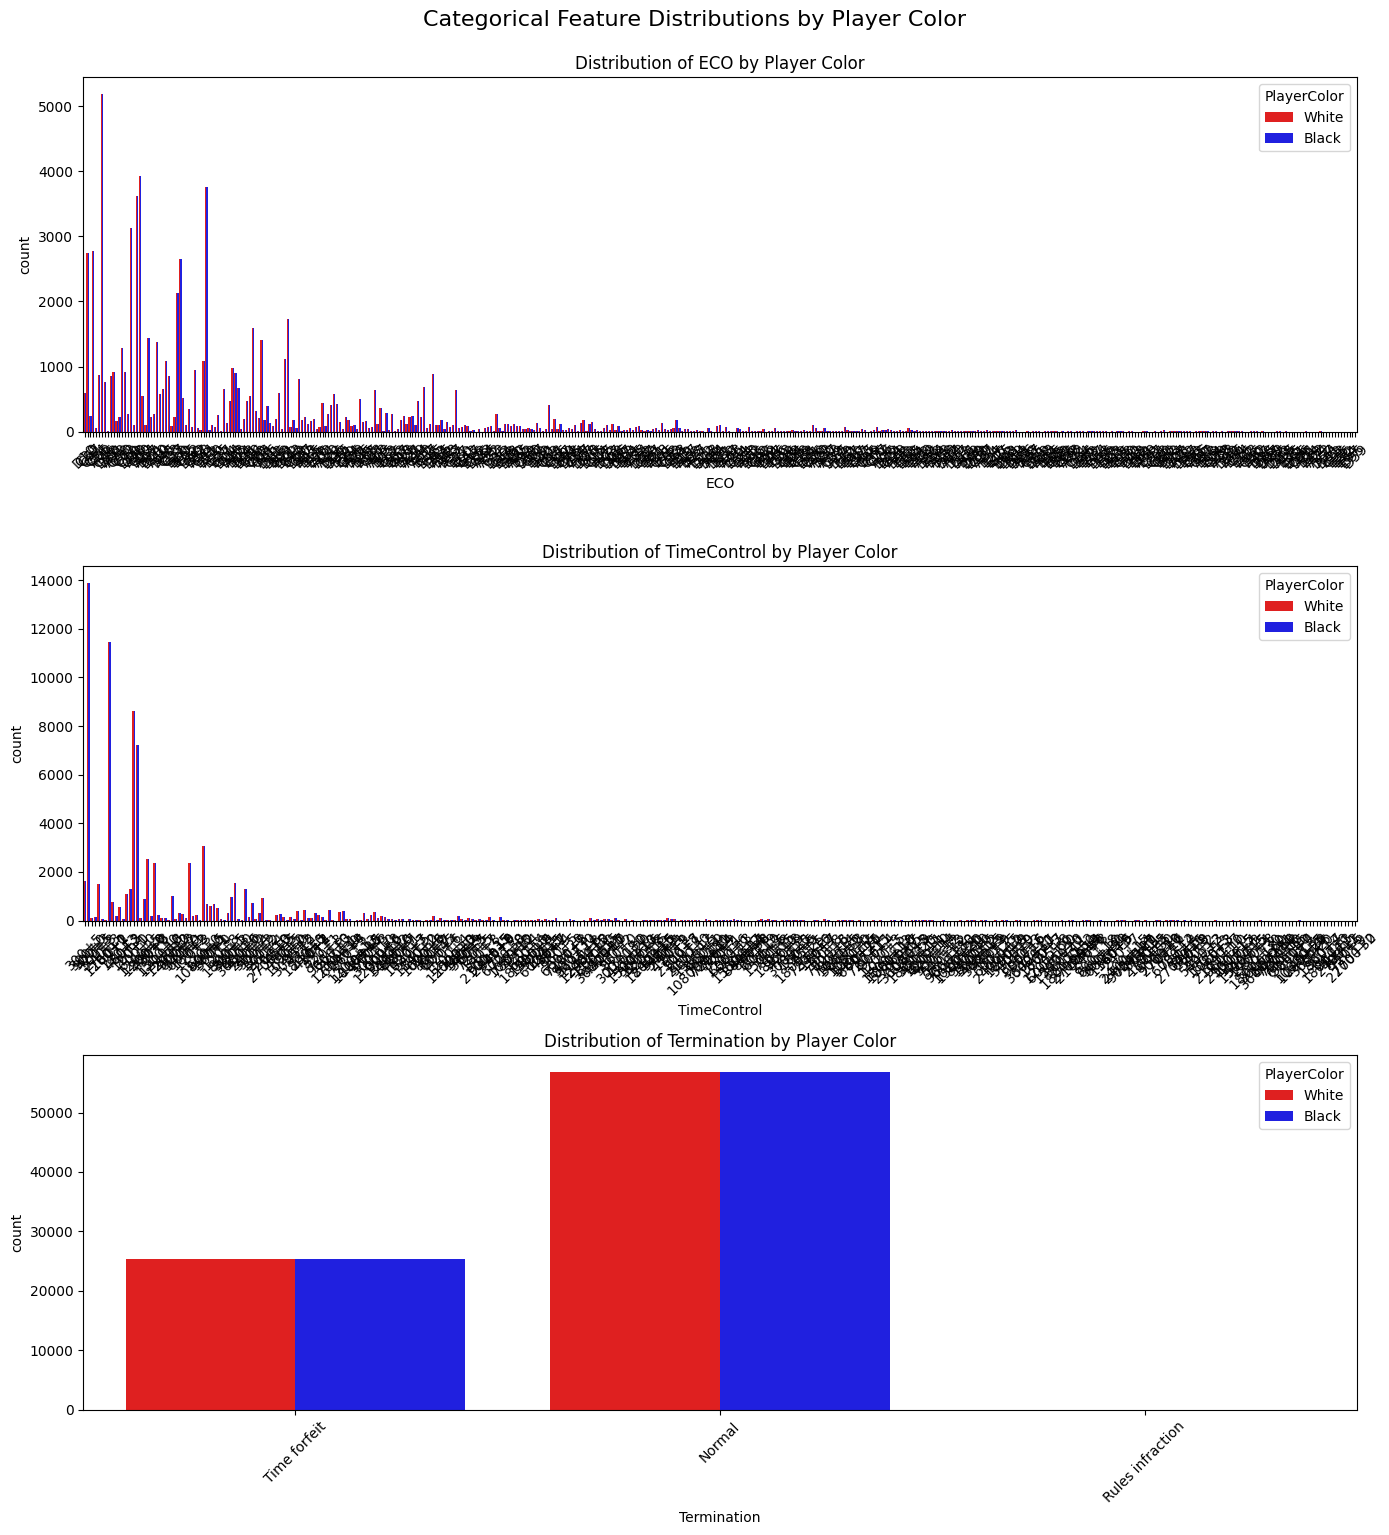

In [10]:


# Prepare the White and Black player data
white_df = df[['WhiteElo', 'WhiteRatingDiff', 'ECO', 'TimeControl', 'Termination']].copy()
white_df.columns = ['Elo', 'RatingDiff', 'ECO', 'TimeControl', 'Termination']
white_df['PlayerColor'] = 'White'

black_df = df[['BlackElo', 'BlackRatingDiff', 'ECO', 'TimeControl', 'Termination']].copy()
black_df.columns = ['Elo', 'RatingDiff', 'ECO', 'TimeControl', 'Termination']
black_df['PlayerColor'] = 'Black'

# Combine into one long DataFrame
combined_df = pd.concat([white_df, black_df], ignore_index=True)

# Select features
numeric_cols = ['Elo', 'RatingDiff']
categorical_cols = ['ECO', 'TimeControl', 'Termination']

# ---- Plot numeric features (histograms) ----
import math

num_plots = len(numeric_cols)
cols = 3
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=combined_df, x=col, hue='PlayerColor', kde=True, element='step', ax=axes[i],
                 palette={'White': 'red', 'Black': 'blue'}, common_norm=False)
    axes[i].set_title(f'Distribution of {col} by Player Color')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Numeric Feature Distributions by Player Color", y=1.02, fontsize=16)
plt.show()

# ---- Plot categorical features (count plots) ----
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(14, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=combined_df, x=col, hue='PlayerColor', palette={'White': 'red', 'Black': 'blue'}, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Player Color')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions by Player Color", y=1.02, fontsize=16)
plt.show()


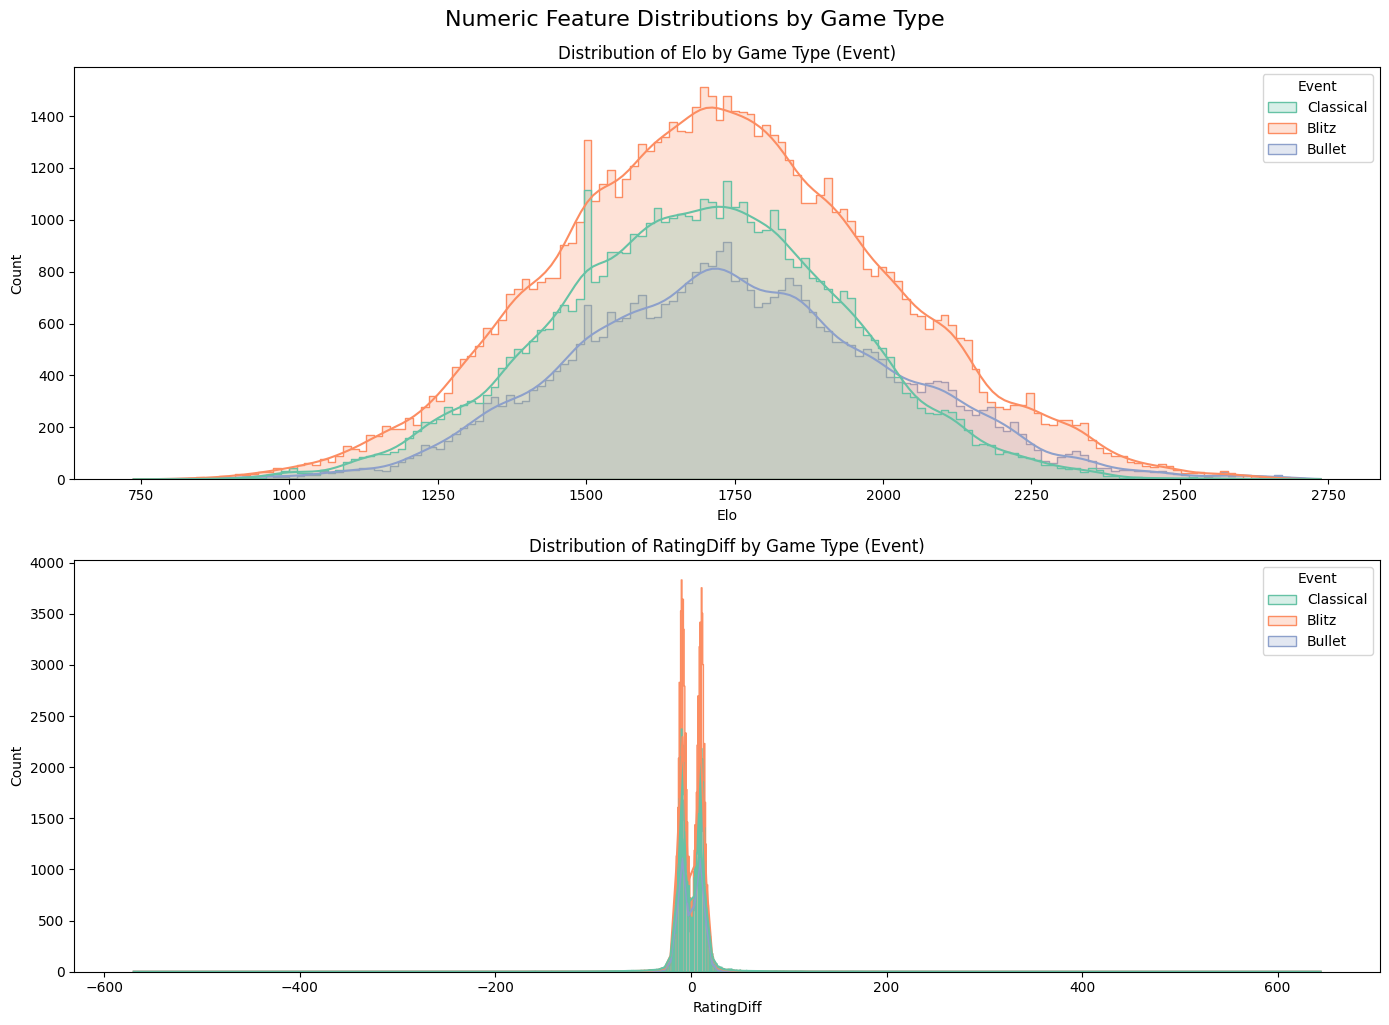

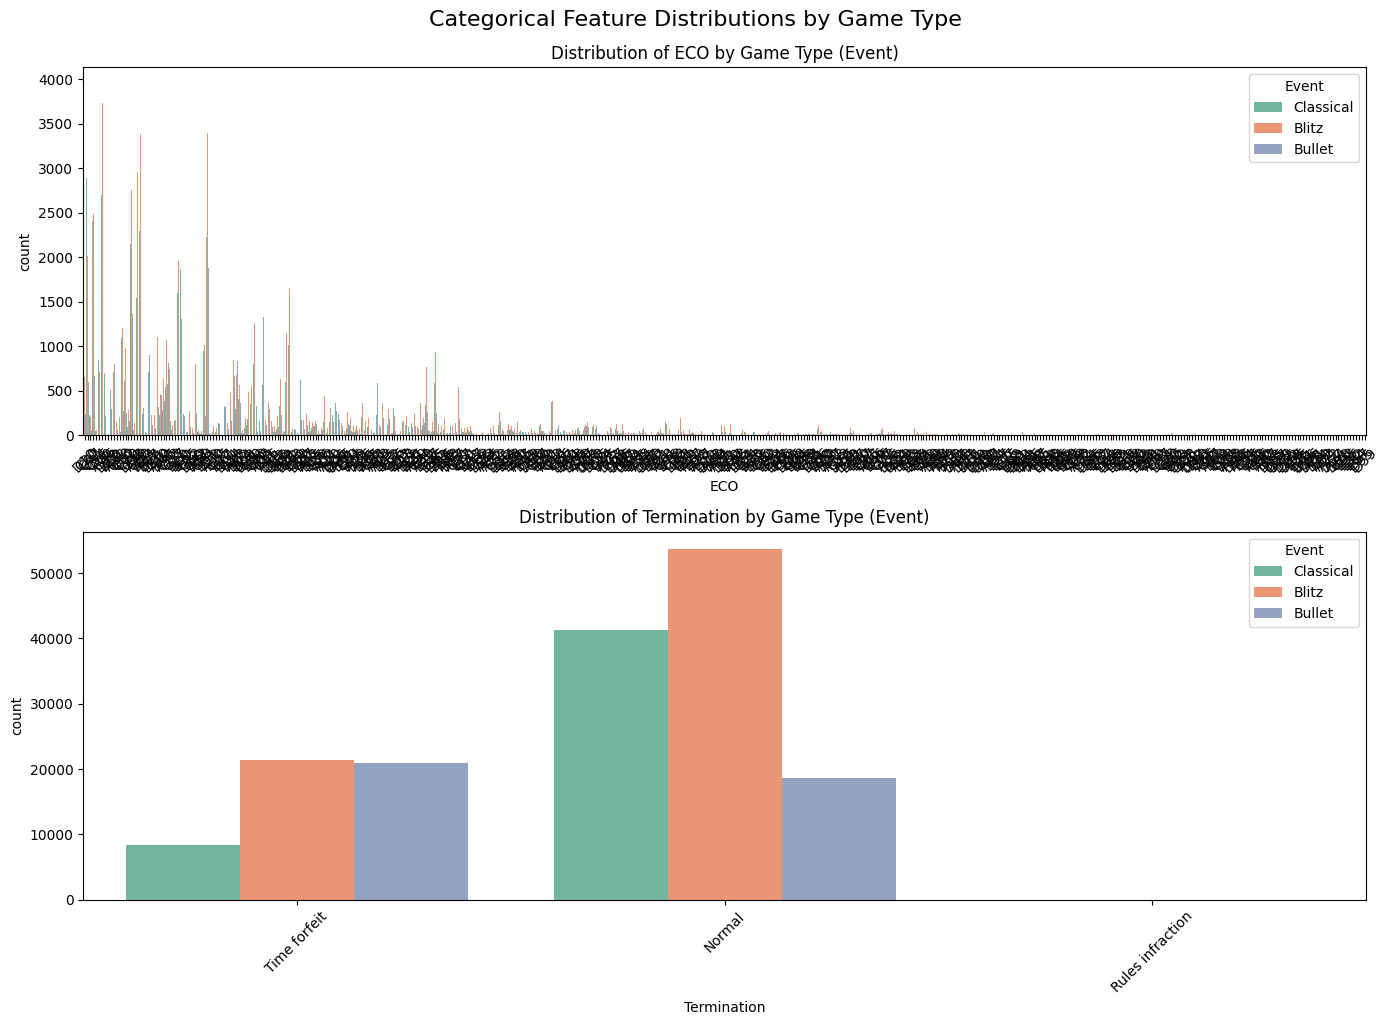

In [11]:

# Keep only the relevant columns and create per-player views
white_df = df[['WhiteElo', 'WhiteRatingDiff', 'ECO', 'Event', 'Termination']].copy()
white_df.columns = ['Elo', 'RatingDiff', 'ECO', 'Event', 'Termination']
white_df['PlayerRole'] = 'White'

black_df = df[['BlackElo', 'BlackRatingDiff', 'ECO', 'Event', 'Termination']].copy()
black_df.columns = ['Elo', 'RatingDiff', 'ECO', 'Event', 'Termination']
black_df['PlayerRole'] = 'Black'

# Combine both player roles
combined_df = pd.concat([white_df, black_df], ignore_index=True)

# ---- Plot Numeric Features ----
numeric_cols = ['Elo', 'RatingDiff']
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(14, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.histplot(
        data=combined_df,
        x=col,
        hue='Event',  # Use Event directly!
        kde=True,
        element='step',
        common_norm=False,
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col} by Game Type (Event)')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.suptitle("Numeric Feature Distributions by Game Type", y=1.02, fontsize=16)
plt.show()

# ---- Plot Categorical Features ----
categorical_cols = ['ECO', 'Termination']
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(14, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=combined_df,
        x=col,
        hue='Event',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col} by Game Type (Event)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions by Game Type", y=1.02, fontsize=16)
plt.show()


In [12]:
white_df.describe()

,Elo,RatingDiff
count,82098.000000,82098.00000
mean,1721.858742,0.53910
std,267.185259,21.85518
min,799.000000,-537.00000
25%,1538.000000,-9.00000
50%,1717.000000,2.00000
75%,1897.000000,10.00000
max,2737.000000,638.00000


In [13]:
black_df.describe()

,Elo,RatingDiff
count,82098.000000,82098.000000
mean,1720.080928,-0.210882
std,268.706008,21.945454
min,738.000000,-570.000000
25%,1536.000000,-10.000000
50%,1716.000000,-2.000000
75%,1896.000000,10.000000
max,2731.000000,644.000000


In [ ]:
Everything under this is trying to move all of the Events I want to use, into seperate csv files

In [24]:
splits = pd.read_csv("chess_games.csv", chunksize=chunk_size)

# Storage dictionaries
mode_dfs = {
    "Blitz": [],
    "Bullet": [],
    "Classical": []
}

In [26]:
for split in splits:
    for mode in mode_dfs.keys():
        # Match regardless of case, ignore missing (NaN) values
        filtered = split[split["Event"].str.contains(mode, case=False, na=False)]
        if not filtered.empty:
            mode_dfs[mode].append(filtered)


In [ ]:
for mode, dfs in mode_dfs.items():
    full_df = pd.concat(dfs)
    full_df.to_csv(f"{mode}_games.csv", index=False)

In [22]:
bullet=pd.read_csv("Bullet_games.csv")

In [23]:
bullet.head(10)

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
